In [1]:
from tqdm.auto import tqdm

def read_mgb(split_file, start_index=1):
    r_text = []
    r_labels = []
    with open(split_file, 'r') as f:
        for line in tqdm(f):
            tokens = [t.lower() for t in line.split()[start_index:]]
            text = [t for t in tokens if '<' not in t]
            labels = ["<none>"]*len(text)
            i_off = 0
            for i, token in enumerate(tokens):
                if '<' in token:
                    labels[i-1-i_off] = token
                    i_off += 1
            r_text.append(text)
            r_labels.append(labels)
            

    return r_text, r_labels

train_texts, train_labels = read_mgb('train.txt')
test_texts, test_labels = read_mgb('dev.txt')

In [2]:
len(train_texts)

162260

In [3]:
list(zip(train_texts[2], train_labels[2]))

[("i'm", '<none>'),
 ('a', '<none>'),
 ('flasher', '<comma>'),
 ('louise', '<full_stop>'),
 ("i'm", '<none>'),
 ('a', '<none>'),
 ('recovering', '<none>'),
 ('flasher', '<full_stop>')]

In [4]:
import numpy as np
flatten = lambda l: [item for sublist in l for item in sublist]

In [5]:
label_types = np.unique(np.array(flatten(train_labels)))

In [55]:
encode = lambda l: [np.where(label_types==item)[0][0]+1 for item in l]
encode_all = lambda l: [encode(item) for item in l]
join_all = lambda l: [' '.join(item) for item in l]
word_offsets = lambda x: [np.cumsum([len(item) for i, item in enumerate(l.split())]) + np.arange(len(l.split())) for l in x]

In [ ]:
def align_labels(encodings, offsets, labels):
    for enc, off in zip(encodings, offsets):
        for x in enumerate(enc.offsets):
            if

In [7]:

train_labels = encode_all(train_labels)
test_labels = encode_all(test_labels)

In [8]:
train_texts = join_all(train_texts)
test_texts = join_all(test_texts)

In [9]:
import wandb

In [10]:
wandb.init(project="APAuT", name="distilroberta")

W&B Run: https://app.wandb.ai/cdminix/apaut/runs/2gk2oql9

In [18]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', use_fast=True)

In [19]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, pad_to_multiple_of=256, return_offsets_mapping=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, pad_to_multiple_of=256, return_offsets_mapping=True)

In [13]:
len(train_encodings['input_ids'][0]), len(test_encodings['input_ids'][0])

(256, 256)

In [66]:
train_texts[100]

'would you have a crack at singing that for me'

In [73]:
word_offsets(train_texts)[10000]

array([ 3,  9, 16])

In [74]:
train_encodings[10000].offsets

[(0, 0),
 (0, 3),
 (4, 9),
 (10, 16),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),

In [23]:
train_texts[1]

'i think maybe this is the right time for me to open up let someone in'

In [24]:
train_encodings['offset_mapping'][0]

[(0, 0),
 (0, 3),
 (4, 6),
 (7, 9),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [22]:
import torch

class MGBDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        target = torch.zeros(len(train_encodings['input_ids'][idx]))
        print(target.shape)
        source = torch.tensor(self.labels[idx])
        target[1:len(source)+1] = source
        item['labels'] = target.long()
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MGBDataset(train_encodings, train_labels)
test_dataset = MGBDataset(test_encodings, test_labels)

In [23]:
print(train_dataset[0]['input_ids'])

torch.Size([256])
tensor([ 101, 2748, 2009, 2003,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [ ]:
[101, 2748, 2009, 2003, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
from transformers import AutoModelForTokenClassification

In [17]:
from transformers import AutoConfig, DistilBertForTokenClassification, Trainer, TrainingArguments
from transformers.optimization import AdamW, get_cosine_schedule_with_warmup
from sklearn.metrics import f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    labels_l = []
    preds_l = []
    for i, label in enumerate(labels):
        # remove padding
        labels_l.append([l for l in label if l != 0])
    for i, pred_item in enumerate(pred.predictions):
        preds_l.append(pred_item.argmax(axis=1)[:len(labels_l[i])])
    filter_labels = ['<none>', '<dots>', '<pad>']
    used_labels = [l for l in id_map.keys() if l not in filter_labels]
    filter_labels = [id_map[l] for l in filter_labels]
    labels, preds = flatten(labels_l), flatten(preds_l)
    f1s = f1_score(labels, preds, average=None)
    f1_dict = {}
    f1_filtered = []
    for i, f in enumerate(f1s):
        if label_map[i] in used_labels:
            f1_dict[f'f1_{label_map[i]}'] = f
            f1_filtered.append(f)
    f1_dict['f1'] = np.mean(f1_filtered)
    return f1_dict

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs 5
    per_device_train_batch_size=64, # batch size per device during training 32, 64
    per_device_eval_batch_size=64,  # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    weight_decay=0.1,
    warmup_steps=500,
    logging_steps=10,
    evaluate_during_training=True,
)

label_map = {i+1: label for i, label in enumerate(label_types)}
label_map[0] = '<pad>'
id_map = {label: i+1 for i, label in enumerate(label_types)}
id_map['<pad>'] = 0

config = AutoConfig.from_pretrained(
    "distilbert-base-uncased",
    num_labels=len(label_types),
    id2label=label_map,
    label2id=id_map
)

model = AutoModelForTokenClassification.from_pretrained("distilbert-base-uncased", config=config)

optimizer = AdamW([
                {'params': model.base_model.parameters()},
                {'params': model.classifier.parameters()}, #'lr': 1e-3}
            ], lr=5e-5, weight_decay=0.1)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset,           # evaluation dataset
    compute_metrics=compute_metrics,     # metrics to compute
    optimizers=(optimizer, get_cosine_schedule_with_warmup(optimizer, 500, (2536)*3-500))
)

trainer.train()

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN t

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable
wandb: Wandb version 0.10.4 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256


KeyboardInterrupt: 

In [15]:
from transformers import AutoConfig, DistilBertForTokenClassification, Trainer, TrainingArguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs 5
    per_device_train_batch_size=64, # batch size per device during training 32, 64
    per_device_eval_batch_size=64,  # batch size for evaluation
    logging_dir='./logs',            # directory for storing logs
    weight_decay=0.1,
    warmup_steps=500,
    logging_steps=10,
    evaluate_during_training=True,
)

In [ ]:
total_steps = len(train_dataloader) // trainer.args.gradient_accumulation_steps
total_steps = max(num_update_steps_per_epoch, 1)
total_steps *= trainer.args.num_train_epochs

In [ ]:
from sklearn.metrics import f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    labels_l = []
    preds_l = []
    for i, label in enumerate(labels):
        # remove padding
        labels_l.append([l for l in label if l != 0])
    for i, pred_item in enumerate(pred.predictions):
        preds_l.append(pred_item.argmax(axis=1)[:len(labels_l[i])])
    filter_labels = ['<none>', '<dots>', '<pad>']
    used_labels = [l for l in id_map.keys() if l not in filter_labels]
    filter_labels = [id_map[l] for l in filter_labels]
    labels, preds = flatten(labels_l), flatten(preds_l)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    f1s = f1_score(labels, preds, average=None)
    f1_dict = {}
    f1_filtered = []
    for i, f in enumerate(f1s):
        if label_map[i] in used_labels:
            f1_dict[f'f1_{label_map[i]}'] = f
            f1_filtered.append(f)
    f1_dict['f1'] = np.mean(f1_filtered)
    return f1_dict

In [58]:
compute_metrics(preds)

/home/cdminix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/cdminix/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'f1_<comma>': 0.0,
 'f1_<exclamation_mark>': 0.0,
 'f1_<full_stop>': 0.0,
 'f1_<question_mark>': 0.0,
 'f1': 0.0}

In [50]:
id_map

{'<comma>': 1,
 '<dots>': 2,
 '<exclamation_mark>': 3,
 '<full_stop>': 4,
 '<none>': 5,
 '<question_mark>': 6,
 '<pad>': 0}

In [ ]:
trainer.compute_metrics = compute_metrics
preds = trainer.predict(test_dataset)

In [200]:
preds = trainer.predict(trainer.eval_dataset)

In [201]:
preds_l = []
for i, labels in enumerate(preds.predictions):
    preds_l.append(labels.argmax(axis=1)[:len(trainer.eval_dataset.labels[i])])

In [202]:
from sklearn.metrics import confusion_matrix, f1_score
conf = confusion_matrix(flatten(trainer.eval_dataset.labels), flatten(preds_l), normalize='true')

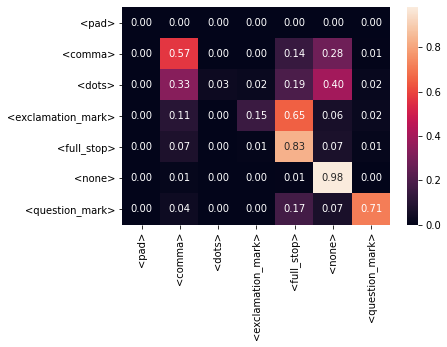

In [203]:
import seaborn as sns
text_labels = ["<pad>"] + list(label_types)
ax = sns.heatmap(conf, annot=True, fmt=".2f", xticklabels=text_labels, yticklabels=text_labels)

In [198]:
results = list(zip(text_labels,f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None)))

[('<pad>', 0.0),
 ('<comma>', 0.6086994383245526),
 ('<dots>', 0.06130268199233716),
 ('<exclamation_mark>', 0.22695924764890282),
 ('<full_stop>', 0.8056557221484153),
 ('<none>', 0.976790093504066),
 ('<question_mark>', 0.7567461099074257)]

In [ ]:
for r in results:
    print(f'{r[0]}: {r[1]:.2f})

<AxesSubplot:>

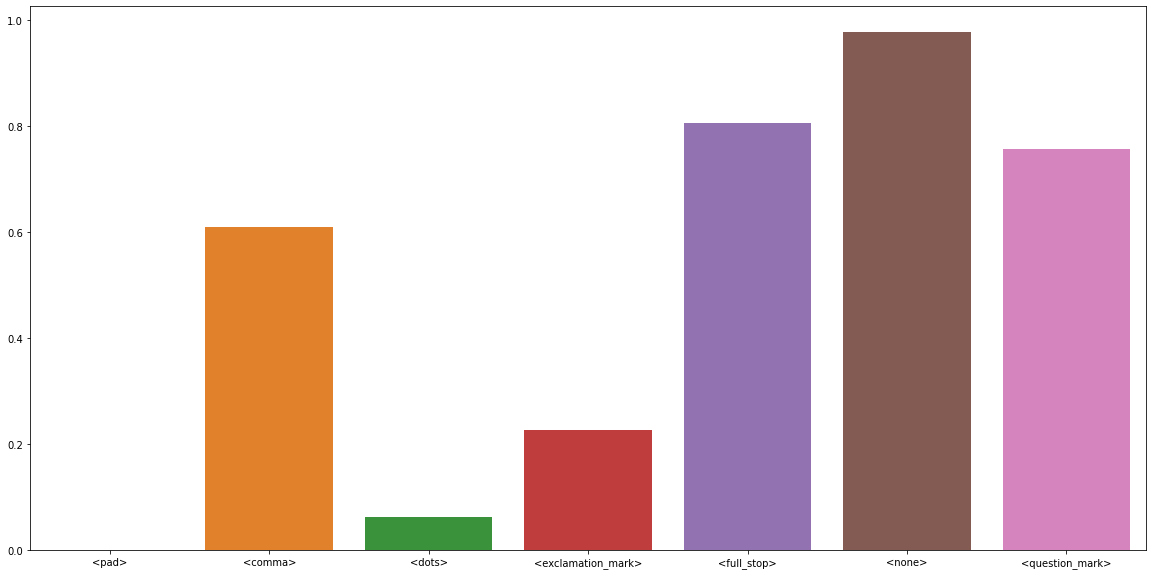

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x=text_labels, y=f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None))

In [209]:
f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average='macro')

0.4908790419322428

In [211]:
f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None)[1:]

array([0.60869944, 0.06130268, 0.22695925, 0.80565572, 0.97679009,
       0.75674611])

In [220]:
np.mean(list(f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None)[1:5])+[f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None)[-1]])

0.49187264000432673

In [1]:
np.mean(f1_score(flatten(trainer.eval_dataset.labels), flatten(preds_l), average=None))

NameError: name 'np' is not defined